# linear regression(线性回归)

* 注意：python版本为3.8

## 导入模块

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

sns.set(context='notebook', style='whitegrid', palette='dark')
%matplotlib inline

## 导入数据

In [2]:
ex1data1_path = './ex1/ex1data1.txt'
ex1data2_path = './ex1/ex1data2.txt'

In [3]:
df = pd.read_csv(ex1data1_path, names=['population', 'profit'])

## 数据eda

In [4]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


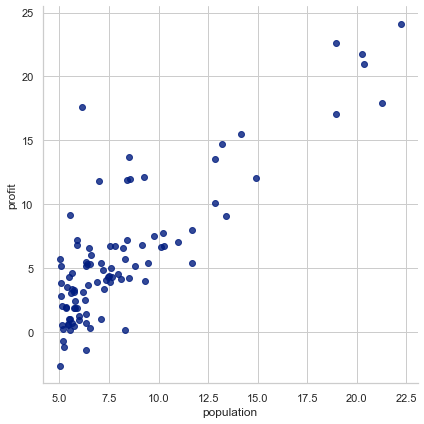

In [7]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)
plt.show()

## 一些函数

1. 读取X,y函数`func_get_X_y()`
2. 读取y函数`func_get_y()`
3. 归一化函数`func_normalize_X()`

In [8]:
def func_get_X_y(df):
    """
    得到X,y
    :param df: A dataframe
    :return X: ndarray matrix
    :return y: target
    """
    X = df.iloc[:, :-1].values
    y = np.array(df.iloc[:, -1])
    return X.T, np.expand_dims(y, axis=0)

In [9]:
def func_normalize_X(X):
    """
    normalize X
    :param X: ndarray matrix
    :return X_norm: norm ndarray matrix
    """
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_std = np.std(X, axis=1, keepdims=True)
    X_norm = (X - X_mean) / X_std
    return X_norm

In [10]:
X, y = func_get_X_y(df)

In [11]:
X.shape

(1, 97)

In [12]:
y.shape

(1, 97)

In [13]:
np.mean(X, axis=1, keepdims=True)

array([[8.1598]])

In [14]:
np.std(X, axis=1, keepdims=True)

array([[3.849884]])

In [15]:
X_norm = func_normalize_X(X)

In [16]:
np.mean(X_norm, axis=1, keepdims=True)

array([[3.1933219e-16]])

In [17]:
np.std(X_norm, axis=1, keepdims=True)

array([[1.]])

## DNN实现linear regression

### 步骤

1. 初始化参数
2. forward step
3. 计算损失
4. backward step
5. 更新参数
6. 将1-5步集合到一起
7. predict

### 初始化参数

In [18]:
def func_initial_parameters(X):
    """
    初始化参数
    :param X: input vector
    :return params
    """
    n_x = X.shape[0]
    
    w = np.zeros((1, n_x))
    b = np.zeros((1, 1))
    
    params = {
        'w': w,
        'b': b
    }
    return params

In [19]:
parameters = func_initial_parameters(X_norm)

In [20]:
for key, value in parameters.items():
    print(key, value)
    print(value.shape)

w [[0.]]
(1, 1)
b [[0.]]
(1, 1)


### forward step

$$
z = w*x+b
$$

In [21]:
def func_forward_propagation(parameters, X):
    """
    forward step
    :param parameters:
    :param X: input vector
    :return z: output vector
    """
    w = parameters['w']
    b = parameters['b']
    z = np.dot(w.T, X) + b
    return z

In [22]:
z = func_forward_propagation(parameters, X_norm)

In [23]:
z.shape

(1, 97)

### compute cost

* cost公式

    $$
    cost = \frac{1}{2m}(z-y)^2
    $$

In [24]:
def func_compute_cost(z, y):
    """
    计算损失
    :param z: output vector
    :param y: true label
    :return cost: cost
    """
    m = y.shape[1]
    
    cost = 1 / (2 * m) * np.sum(np.power(z-y, 2))
    cost = cost.squeeze()
    return cost

In [25]:
cost = func_compute_cost(z, y)

In [26]:
cost

32.072733877455676

### backward step

* 梯度公式

    $$
    dw = 1/m * X^T(z-y)  \\
    db = 1/m * (z-y)
    $$

In [35]:
def func_backward_propagation(parameters, z, X, y):
    """
    计算梯度
    :param parameters:
    :param X:
    :param y:
    :param z:
    :return grads:
    """
    
    m = X.shape[1]
    
    dw = 1 / m * np.dot(X, (z-y).T)
    db = 1 / m * np.sum(z - y, axis=1, keepdims=True)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads

In [36]:
grads = func_backward_propagation(parameters, z, X, y)

In [37]:
grads

{'dw': array([[-65.32884975]]), 'db': array([[-5.83913505]])}

### 更新参数

* 公式

    $$
    \theta = \theta - \alpha * d\theta
    $$

In [38]:
def func_update_parameters(parameters, grads, lr):
    """
    更新参数
    :param parameters:
    :param grads:
    :param lr:
    :return parameters:
    """
    w = parameters['w']
    b = parameters['b']
    
    dw = grads['dw']
    db = grads['db']
    
    w = w - lr * dw
    b = b - lr * db
    
    parameters = {
        'w': w,
        'b': b
    }
    return parameters

In [39]:
parameters = func_update_parameters(parameters, grads, lr=0.01)

In [40]:
parameters

{'w': array([[0.6532885]]), 'b': array([[0.05839135]])}

### 整合到模型

In [41]:
def func_linear_model(X, y, num_epochs=10000, lr=0.01, print_cost=False):
    """
    神经网络实现linear model
    :param X:
    :param y:
    :param num_epochs:
    :param lr:
    :param print_cost:
    :return parameters
    """
    parameters = func_initial_parameters(X)
    
    for i in range(num_epochs):
        z = func_forward_propagation(parameters, X)
        cost = func_compute_cost(z, y)
        grads = func_backward_propagation(parameters, z, X, y)
        parameters = func_update_parameters(parameters, grads, lr)
        
        if i % 1000 == 0 and print_cost:
            print('cost after %i epoch: %f' % (i, cost))
    
    return parameters

In [57]:
parameters = func_linear_model(X, y, print_cost=True)

cost after 0 epoch: 32.072734
cost after 1000 epoch: 4.515956
cost after 2000 epoch: 4.478028
cost after 3000 epoch: 4.477000
cost after 4000 epoch: 4.476972
cost after 5000 epoch: 4.476971
cost after 6000 epoch: 4.476971
cost after 7000 epoch: 4.476971
cost after 8000 epoch: 4.476971
cost after 9000 epoch: 4.476971


In [58]:
parameters

{'w': array([[1.19303364]]), 'b': array([[-3.89578082]])}

### 可视化

In [59]:
w = parameters['w'].squeeze()
b = parameters['b'].squeeze()

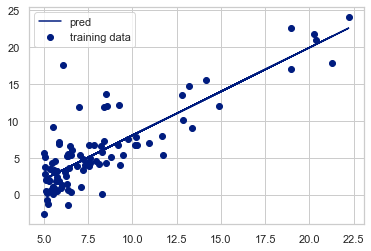

In [67]:
plt.scatter(X, y, label='training data')
plt.plot(X.squeeze(), (w*X+b).squeeze(), label='pred')
plt.legend(loc=2)
plt.show()